# RIA

In [1]:
from string import punctuation
from collections import Counter
import datetime
import matplotlib.pyplot as plt

In [2]:
import sys

In [3]:
sys.path.append('C:\\projects\\datascience\\proj_news_viz\\nlp\\experiments\\exp-001_Prepare_csv_for_EDA\\scripts')

In [4]:
from reader import CSVCorpusReader

In [5]:
# Создадим объект чтения корпуса
data = CSVCorpusReader('../../../data/interim')

In [6]:
# Новостные источники
data.categories()

['gazeta', 'interfax', 'iz', 'meduza', 'ria', 'rt', 'tass']

In [7]:
# Имеющиеся файлы в корпусе
data.fileids()

['gazeta/gazeta.csv',
 'interfax/interfax.csv',
 'iz/iz.csv',
 'meduza/meduza.csv',
 'ria/ria.csv',
 'rt/rt.csv',
 'tass/tass.csv']

In [8]:
# Проверим размер нашего сета, который будем обрабатывать
list(data.sizes(None, 'ria'))

[(FileSystemPathPointer('C:\\projects\\datascience\\proj_news_viz\\nlp\\data\\interim\\ria\\ria.csv'),
  270404428)]

## Общий предварительный анализ

In [9]:
# Предварительный анализ всех файлов из каталога новостного источника
data.describe(None, 'ria')

{'Количество файлов': 1,
 'Количество источников новостей': 1,
 'Количество обработанных новостей': 101544,
 'Количество предложений': 571652,
 'Количество слов': 22432361,
 'Количество токенов (словарь)': 330958,
 'Коэффициент лексического разнообразия (lexical diversity)': 67.78008387771258,
 'Среднее количество новостей по отношению к файлам': 101544.0,
 'Среднее количество предложений в новостях': 5.629598991570157,
 'Начальная дата в обработке': '2018-12-05 14:29:00',
 'Конечная дата в обработке': '2019-08-10 06:35:00',
 'Количество повторяющихся новостей': 36,
 'Количество пустых новостных элементов': 2,
 'Время обработки в секундах': 230.80479288101196}

## EDA

In [10]:
list_data = list(data.docs(None, 'ria'))

In [11]:
# Так выглядет датасет RT
list_data[:5]

[OrderedDict([('date', '2019-08-10 06:35:00'),
              ('url', 'https://ria.ru/20190810/1557366973.html'),
              ('edition', 'ria.ru'),
              ('topics', 'Происшествия'),
              ('authors', ''),
              ('title',
               'Восемнадцать туристов застряли на пляже в Приморье из-за ливней'),
              ('text',
               'ВЛАДИВОСТОК, 10 авг – РИА Новости.nВосемнадцать туристов, среди которых есть двое детей, застряли на пляже в Приморье из-за ливней, сообщает ГУ МЧС РФ по Приморскому краю.n"На пляже находятся 18 человек, из них двое детей. Люди остались отрезанными и самостоятельно выбраться с места отдыха не могут", - сообщает региональный главк МЧС.nСигнал о бедствии поступил в пятницу в оперативную дежурную смену Центра управления в кризисных ситуациях. Выяснилось, что в результате подъёма уровня воды затруднён проезд легкового автотранспорта к пляжу через устье ручья Чёрный в районе бухты Ежовая. По сообщению спасателей, все отдыхающие 

In [0]:
# Можно в пандас загрузить и посмотреть

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(list_data)

In [14]:
df.head()

,date,url,edition,topics,authors,title,text,reposts_fb,reposts_vk,reposts_ok,reposts_twi,reposts_lj,reposts_tg,likes,views,comm_count,None
0,2019-08-10 06:35:00,https://ria.ru/20190810/1557366973.html,ria.ru,Происшествия,,Восемнадцать туристов застряли на пляже в Прим...,"ВЛАДИВОСТОК, 10 авг – РИА Новости.nВосемнадцат...",-,-,-,-,-,-,0,70,-,[]
1,2019-08-10 03:25:00,https://ria.ru/20190810/1557366343.html,ria.ru,В мире,,Президент Парагвая даст показания по делу о сп...,"БУЭНОС-АЙРЕС, 10 авг – РИА Новости.nПрезидент ...",-,-,-,-,-,-,1,177,-,[]
2,2019-08-10 03:26:00,https://ria.ru/20190810/1557366366.html,ria.ru,В мире,,Андрейченко обвинили в угрозе теракта после но...,"МОСКВА, 10 авг - РИА Новости.nДмитрию Андрейче...",-,-,-,-,-,-,2,919,-,[]
3,2019-08-10 03:31:00,https://ria.ru/20190810/1557366398.html,ria.ru,В мире,,"Япония заявила, что не испугалась субботних пу...","МОСКВА, 10 авг - РИА Новости.nПравительство Яп...",-,-,-,-,-,-,1,140,-,[]
4,2019-08-10 03:32:00,https://ria.ru/20190810/1557366421.html,ria.ru,Происшествия,,"Власти Якутии погасят долг перед жителями, уча...","ЯКУТСК, 10 авг – РИА Новости.nСредства резервн...",-,-,-,-,-,-,3,1196,-,[]


### Обработка словаря

In [15]:
# Соберем токены
tokens = data.gettokens

In [16]:
punctuation = list(punctuation)

In [17]:
punctuation += ['«','»','—', 'n','»,','».', '–', '...']

In [18]:
garbage_words = ['nранее', 'nв', 'nпо', 'nтакже','u','n—', 'nn']

In [19]:
tokens = {item:tokens[item] for item in tokens if item not in punctuation}

In [20]:
tokens = {item:tokens[item] for item in tokens if item not in garbage_words}

In [21]:
stopwords_01 = open('../../../data/another/stopwords.txt', 'r', encoding='UTF-8')
stopwords_01 = stopwords_01.read().split('\n')
stopwords_02 = open('../../../data/another/stopwords_02.txt', 'r', encoding='UTF-8')
stopwords_02 = stopwords_02.read().split('\n')

In [22]:
stopwords = stopwords_01 + stopwords_02

In [23]:
tokens_without_stopwords = {item:tokens[item] for item in tokens if item not in stopwords}

### Аналитика по словам

#### Топ-20 слов без удаления стоп-слов

In [24]:
Counter(tokens).most_common(20)

[('в', 886914),
 ('и', 432220),
 ('на', 330528),
 ('по', 223339),
 ('что', 222487),
 ('с', 197353),
 ('не', 142613),
 ('новости', 138829),
 ('риа', 138196),
 ('о', 90332),
 ('из', 83502),
 ('для', 70031),
 ('к', 69962),
 ('за', 61882),
 ('его', 61732),
 ('он', 61204),
 ('как', 61012),
 ('москва', 60294),
 ('года', 58532),
 ('а', 57231)]

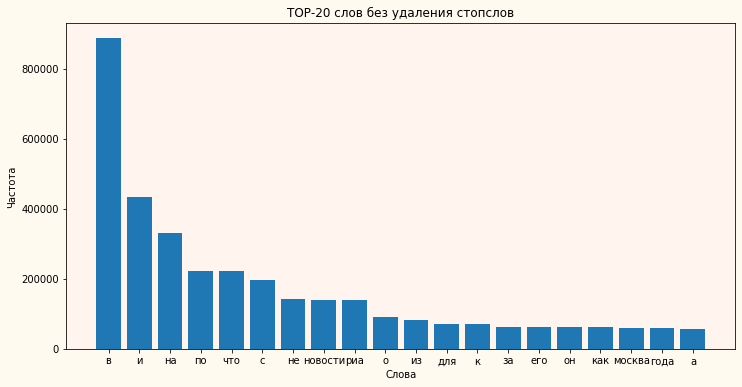

In [25]:
x = dict(Counter(tokens).most_common(20)).keys()
y = dict(Counter(tokens).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

#### Топ-20 слов после удаления стоп-слов

In [25]:
Counter(tokens_without_stopwords).most_common(20)

[('новости', 138829),
 ('риа', 138196),
 ('россии', 51618),
 ('сша', 48031),
 ('рф', 47712),
 ('заявил', 43615),
 ('украины', 28308),
 ('словам', 28256),
 ('сообщил', 26347),
 ('данным', 26017),
 ('президента', 24762),
 ('говорится', 21799),
 ('области', 21360),
 ('страны', 20605),
 ('глава', 20200),
 ('мая', 19620),
 ('отметил', 18077),
 ('сообщает', 17014),
 ('рублей', 16237),
 ('из-за', 16175)]

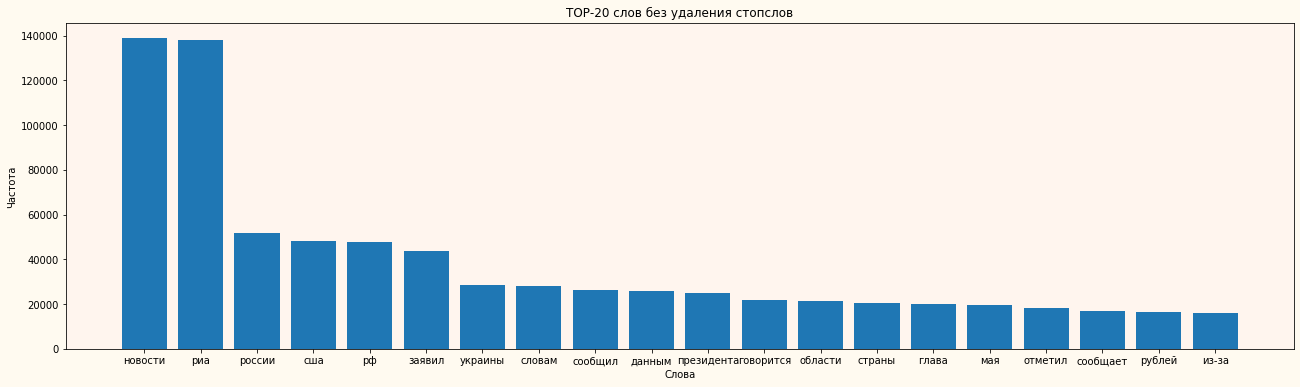

In [26]:
x = dict(Counter(tokens_without_stopwords).most_common(20)).keys()
y = dict(Counter(tokens_without_stopwords).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(22)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

## Рубрики в разрезе новостей

### Количество рубрик

In [27]:
list_topics = list(data.listcolumns(None, 'ria', 'topics'))

In [28]:
len(set(list_topics))

1120

### Рубрики в разрезе количества новостей

In [29]:
Counter(list_topics).most_common(20)

[('В мире', 44133),
 ('Происшествия', 18209),
 ('Общество', 13282),
 ('Экономика', 7264),
 ('РИА Наука', 3603),
 ('Политика', 3224),
 ('Россия', 2024),
 ('Безопасность', 1591),
 ('США', 813),
 ('Украина', 673),
 ('Сирия', 583),
 ('Москва', 297),
 ('Технологии', 257),
 ('религия', 192),
 ('Венесуэла', 191),
 ('Санкт-Петербург', 170),
 ('Новости - Туризм', 168),
 ('Израиль', 131),
 ('Владимир Путин', 96),
 ('Культура', 93)]

## Распределение количества новостей по месяцам

### Удаление дубликатов

In [30]:
# Новый словарь, ключами которого будут новости, таким образом будет создан
# новый словарь, без дубликатов
news_by_dict = {i['text']: i for i in list_data}
new_items = list(news_by_dict.values())

In [31]:
# Проверь, что количество дубликатов совпало с тем, что были в предварительном анализе
# все верно
len(list_data) - len(new_items)

36

### Получение распределения

In [32]:
def getMonthDate(date):
  """
  Возвращает дату в формате ММ-ГГГГ
  """
  date = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
  return '-'.join(['0' + str(date.month) if date.month<10 else str(date.month), str(date.year)])

In [33]:
# Подсчет количества новостей в разрезе месяца и года
list_dates = [getMonthDate(x['date']) for x in new_items]

In [34]:
month_year = Counter(list_dates)

In [35]:
len(month_year)

9

In [36]:
month_year.most_common(9)

[('07-2019', 13908),
 ('01-2019', 13180),
 ('06-2019', 13065),
 ('04-2019', 13064),
 ('05-2019', 11423),
 ('12-2018', 11329),
 ('02-2019', 11096),
 ('03-2019', 10513),
 ('08-2019', 3930)]

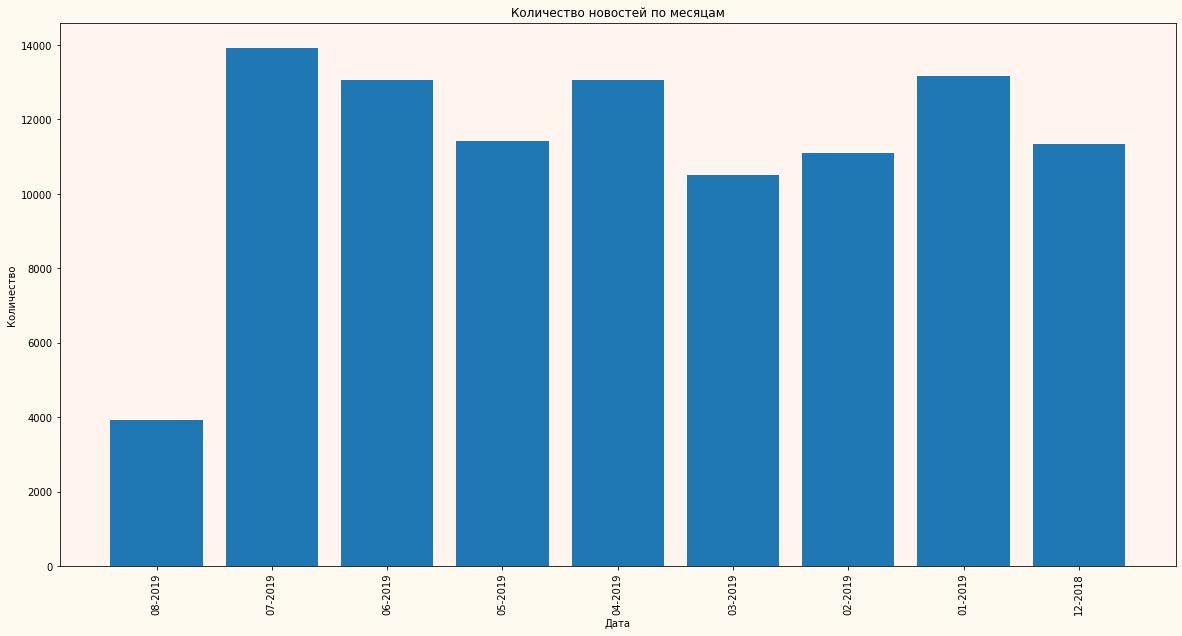

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x = month_year.keys(),
        height = month_year.values())
plt.xticks(rotation='vertical')
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

ax.set_title('Количество новостей по месяцам')
ax.set_ylabel('Количество')
ax.set_xlabel('Дата')
plt.show()